In [13]:
import pandas as pd

In [16]:
wine = pd.read_csv('wine_quality_red_preprocessed.csv')
wine = wine.drop(["Unnamed: 0"], axis=1)
wine.head()

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.66         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]

Проверка на наличие выбросов в датасете

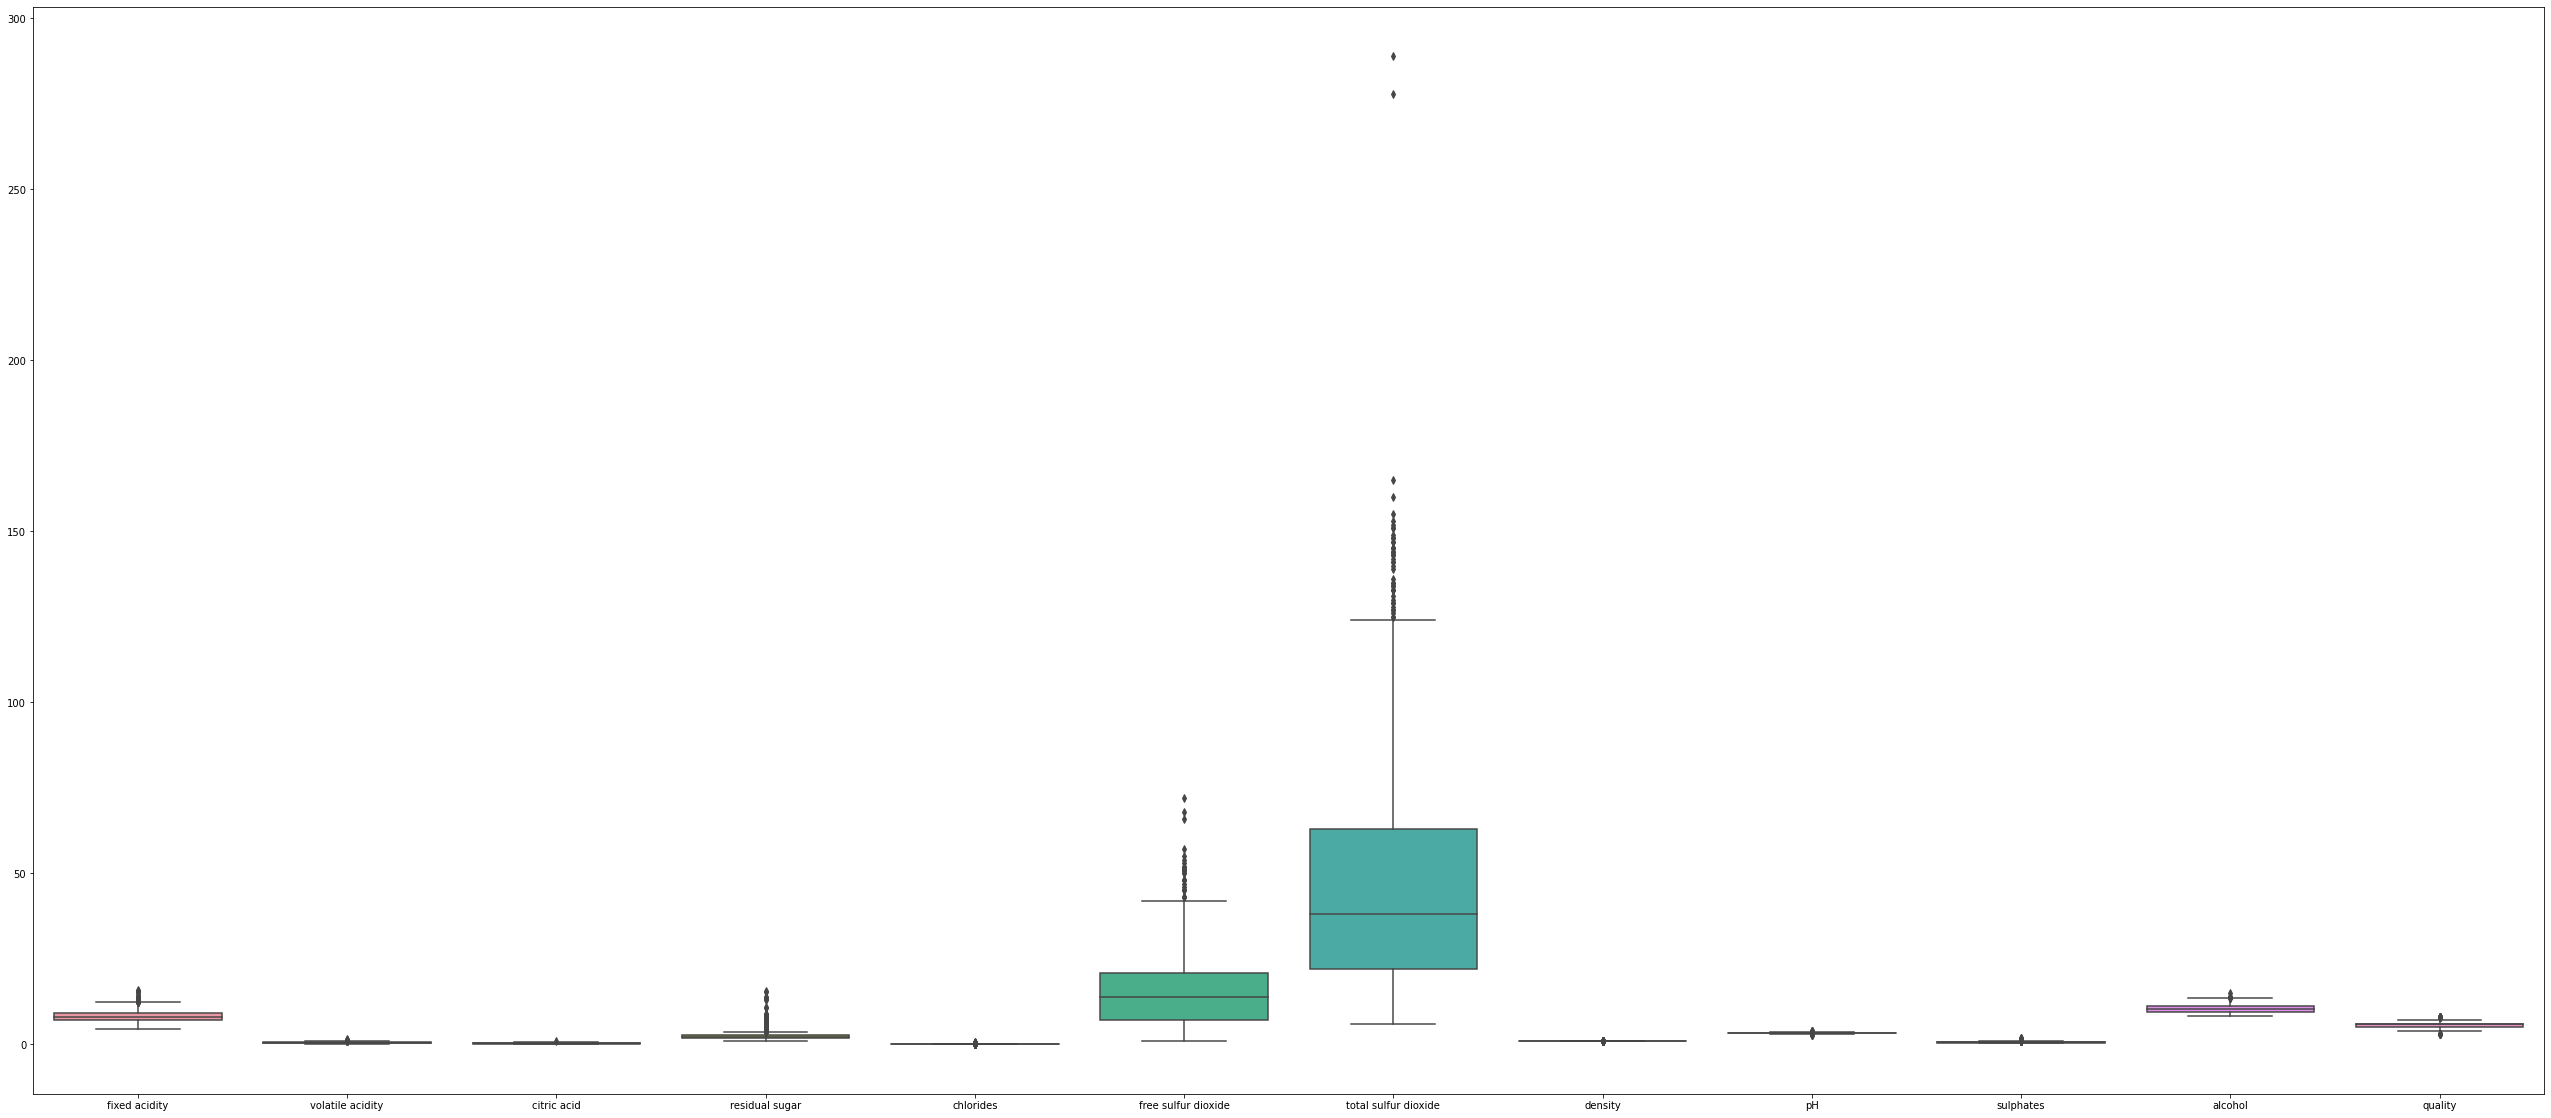

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(45,20))
sns.boxplot(data=wine)

Удаление выбросов

In [18]:
Q1 = wine.quantile(0.25)
Q3 = wine.quantile(0.75)
IQR = Q3 - Q1
wine = wine[~((wine < (Q1 - 1.5 * IQR)) |(wine > (Q3 + 1.5 * IQR))).any(axis=1)]
wine.shape

(1005, 12)

In [19]:
plt.figure(figsize=(45,20))
sns.boxplot(data = wine)

In [20]:
X = wine.iloc[:, :-1].values
y = wine.iloc[:,-1 :].values

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Линейная регрессия

Ссылка на документацию по Линейной регрессии

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

In [45]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

y_test_pred = LR.predict(X_test)
print('MSE test: {:.3f}'.format(mean_squared_error(y_test, y_test_pred)))
print('R^2 test: {:.3f}'.format(r2_score(y_test, y_test_pred)))
print('RMSE test: {:.3f}'.format(mean_squared_error(y_test, y_test_pred,squared=False)))
print('MAE test: {:.3f}'.format(mean_absolute_error(y_test, y_test_pred)))

MSE test: 0.378
R^2 test: 0.364
RMSE test: 0.615
MAE test: 0.500


Подбор гиперпараметров

In [49]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_jobs':[1, 2, 3, 4, 5], 'fit_intercept':[True, False], 'normalize':[True, False]}
LR = LinearRegression()
clf = GridSearchCV(LR, parameters)
clf.fit(X_train, y_train)
clf.best_params_

{'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

In [ ]:
Лучшие параметры - это параметры по умолчанию

# Регрессия дерева решений

In [30]:
from sklearn import tree

dtr = tree.DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

y_train_pred = dtr.predict(X_train)
y_test_pred = dtr.predict(X_test)
print('MSE test: {:.3f}'.format(mean_squared_error(y_test, y_test_pred)))
print('R^2 test: {:.3f}'.format(r2_score(y_test, y_test_pred)))
print('RMSE test: {:.3f}'.format(mean_squared_error(y_test, y_test_pred,squared=False)))
print('MAE test: {:.3f}'.format(mean_absolute_error(y_test, y_test_pred)))

MSE test: 0.647
R^2 test: -0.087
RMSE test: 0.804
MAE test: 0.517


# Лассо

Ссылка на документацию по Лассо

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso

In [41]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

y_test_pred = lasso.predict(X_test)
print('MSE test: {:.3f}'.format(mean_squared_error(y_test, y_test_pred)))
print('R^2 test: {:.3f}'.format(r2_score(y_test, y_test_pred)))
print('RMSE test: {:.3f}'.format(mean_squared_error(y_test, y_test_pred,squared=False)))
print('MAE test: {:.3f}'.format(mean_absolute_error(y_test, y_test_pred)))

MSE test: 0.602
R^2 test: -0.011
RMSE test: 0.776
MAE test: 0.673


Подбор гиперпараметров

In [61]:
from sklearn.model_selection import GridSearchCV

parameters = {'alpha':[1, 2, 3, 4, 5], 'max_iter':[1, 2, 3, 4, 5]}
lasso = Lasso()
clf = GridSearchCV(lasso, parameters)
clf.fit(X_train, y_train)
clf.best_params_

{'alpha': 1, 'max_iter': 1}

In [62]:
lasso = Lasso(max_iter=1)
lasso.fit(X_train,y_train)

y_test_pred = lasso.predict(X_test)
print('MSE test: {:.3f}'.format(mean_squared_error(y_test, y_test_pred)))
print('R^2 test: {:.3f}'.format(r2_score(y_test, y_test_pred)))
print('RMSE test: {:.3f}'.format(mean_squared_error(y_test, y_test_pred,squared=False)))
print('MAE test: {:.3f}'.format(mean_absolute_error(y_test, y_test_pred)))

MSE test: 0.602
R^2 test: -0.011
RMSE test: 0.776
MAE test: 0.673


Гиперпараметры не дали улучшений

# Гребневая регрессия

Ссылка на документацию по Гребневой регрессии

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge

In [23]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

y_test_pred = ridge.predict(X_test)
print('MSE test: {:.3f}'.format(mean_squared_error(y_test, y_test_pred)))
print('R^2 test: {:.3f}'.format(r2_score(y_test, y_test_pred)))
print('RMSE test: {:.3f}'.format(mean_squared_error(y_test, y_test_pred,squared=False)))
print('MAE test: {:.3f}'.format(mean_absolute_error(y_test, y_test_pred)))

MSE test: 0.378
R^2 test: 0.364
RMSE test: 0.615
MAE test: 0.500


Подбор гиперпараметров

In [58]:
from sklearn.model_selection import GridSearchCV

parameters = {'alpha':[10, 11, 12, 13, 14, 15], 'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
ridge = Ridge()
clf = GridSearchCV(ridge, parameters)
clf.fit(X_train, y_train)
clf.best_params_

{'alpha': 15, 'solver': 'sparse_cg'}

In [59]:
ridge = Ridge(alpha=15, solver='sparse_cg')
ridge.fit(X_train, y_train)

y_test_pred = ridge.predict(X_test)
print('MSE test: {:.3f}'.format(mean_squared_error(y_test, y_test_pred)))
print('R^2 test: {:.3f}'.format(r2_score(y_test, y_test_pred)))
print('RMSE test: {:.3f}'.format(mean_squared_error(y_test, y_test_pred,squared=False)))
print('MAE test: {:.3f}'.format(mean_absolute_error(y_test, y_test_pred)))

MSE test: 0.379
R^2 test: 0.363
RMSE test: 0.616
MAE test: 0.500


Подбор гиперпараметров привел к небольшому улучшению работы модели




# Elastic Net регрессия

Ссылка на документацию по Elastic Net регрессии

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet

In [26]:
from sklearn.linear_model import ElasticNet

en = ElasticNet()
en.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

y_train_pred = en.predict(X_train)
y_test_pred = en.predict(X_test)
print('MSE test: {:.3f}'.format(mean_squared_error(y_test, y_test_pred)))
print('R^2 test: {:.3f}'.format(r2_score(y_test, y_test_pred)))
print('RMSE test: {:.3f}'.format(mean_squared_error(y_test, y_test_pred,squared=False)))
print('MAE test: {:.3f}'.format(mean_absolute_error(y_test, y_test_pred)))

MSE test: 0.602
R^2 test: -0.011
RMSE test: 0.776
MAE test: 0.673
